# Performance Bencharmk: Accessing Datasets in the Jasmin Object Store

In [1]:
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain

from performance_plots import plot_barplot, plot_lineplot
from performance_utils import calculate_speed_up

In [2]:
# Warning settings
warnings.filterwarnings("ignore")

# Seaborn settings
sns.set()
sns.set_style("white")
sns.set_context("notebook", font_scale=0.95)

# Matplotlib settings
plt.rcParams.update({"xtick.bottom": True, "ytick.left": True})

In [3]:
output_file_prefix = "performance_annual_mean_depth_profile_grid"
save_fig = False
error_kwargs = {"capsize": 0.1, "errwidth": 1, "errorbar": "sd"}

## Annual Mean Depth Profile of a Grid Point

In [4]:
# Open the csv file
df = pd.read_csv(
    "benchmark_data/csv_files/performance_annual_mean_depth_profile_grid.csv"
)
df.drop(df.filter(regex="Unname"), axis=1, inplace=True)
df.head()

,Replicate,Configuration,Walltime,Label,Dataset,Number of cores
0,1,1:1:1,21.492388,multiprocessing,kerchunk-part-month-orig,1
1,2,1:1:1,22.957879,multiprocessing,kerchunk-part-month-orig,1
2,3,1:1:1,22.638440,multiprocessing,kerchunk-part-month-orig,1
3,4,1:1:1,21.882091,multiprocessing,kerchunk-part-month-orig,1
4,1,2:2:1,11.546989,multiprocessing,kerchunk-part-month-orig,2


### Walltime as a function of the number of cores

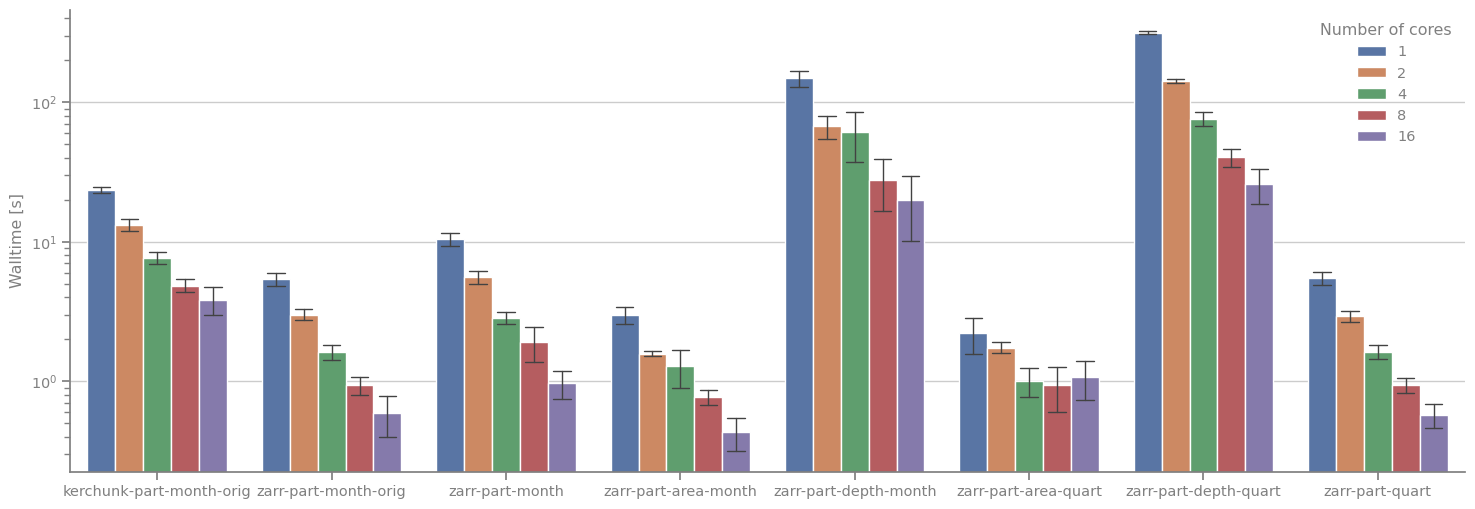

In [5]:
f, ax = plt.subplots(figsize=(18, 6))
ax = plot_barplot(ax, df, leg_title="Number of cores", error_kwargs=error_kwargs)
if save_fig:
    plt.savefig(
        f"{output_file_prefix}_walltime_vs_ncores.png",
        dpi=300,
        transparent=True,
        bbox_inches="tight",
    )
plt.show()

### Best performing parallel configuration: distributed or shared Memory?

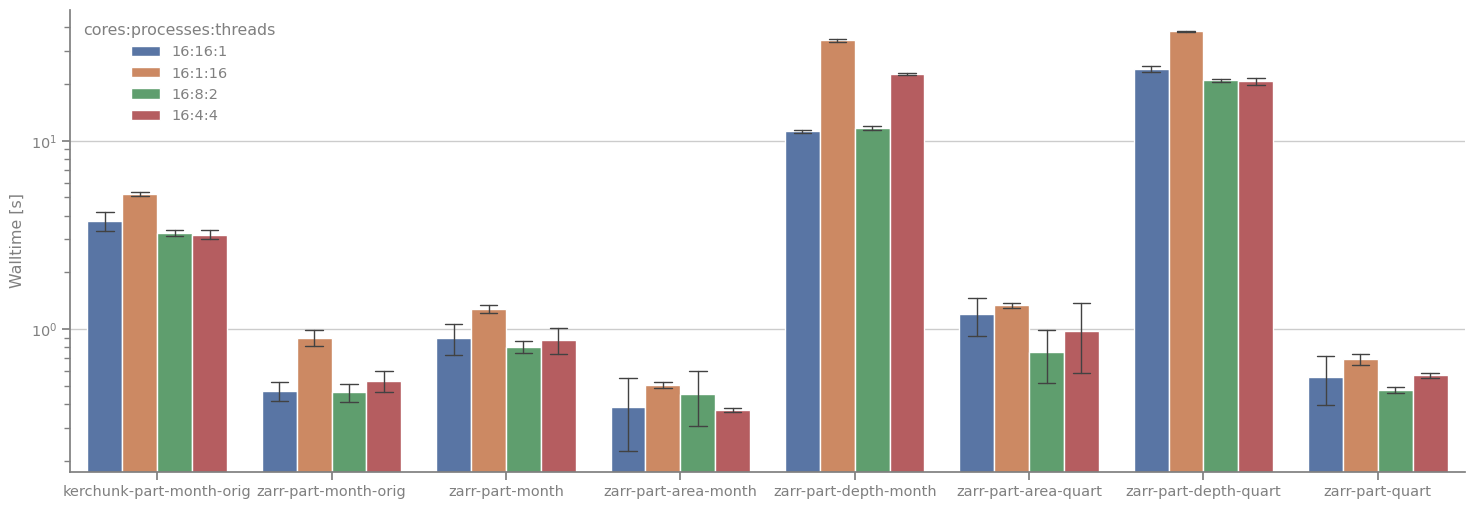

In [6]:
df_grid_16 = df.loc[(df["Number of cores"] == 16)]

f, ax = plt.subplots(figsize=(18, 6))
ax = plot_barplot(
    ax,
    df_grid_16,
    hue="Configuration",
    leg_title="cores:processes:threads",
    error_kwargs={"capsize": 0.1, "errwidth": 1, "errorbar": "sd"},
)

if save_fig:
    plt.savefig(
        f"{output_file_prefix}_parallel_configuration.png",
        dpi=300,
        transparent=True,
        bbox_inches="tight",
    )

plt.show()

### Best performing parallel configuration: distributed or shared memory?

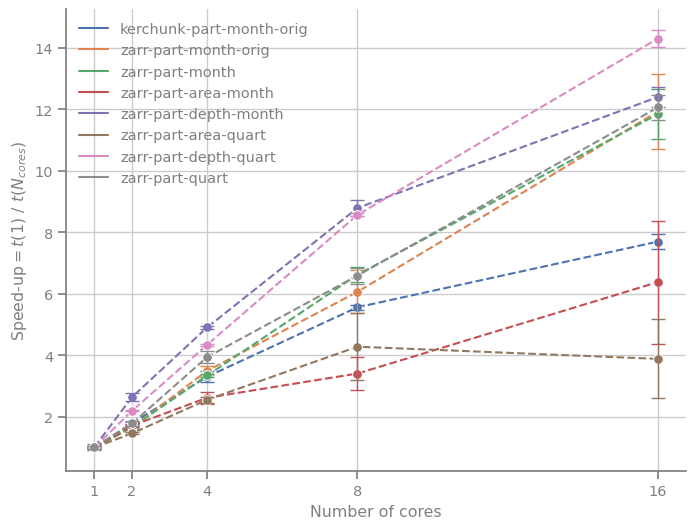

In [7]:
# Select best performing configuration
df_mixed_2 = df.loc[(df["Label"] == "mixed-2")]
df_mixed_2 = df_mixed_2.reset_index()

# Calculate speed-up
df_mixed_2 = calculate_speed_up(df_mixed_2)

# Plot
f, ax = plt.subplots(figsize=(8, 6))
error_kwargs = {
    "err_kws": {"lw": 1, "capsize": 5},
    "err_style": "bars",
    "errorbar": "sd",
}
plot_lineplot(
    ax,
    df_mixed_2,
    x="Number of cores",
    y="Speed-up",
    hue="Dataset",
    error_kwargs=error_kwargs,
)

# Extra costumisation
ax.set_xticks([1, 2, 4, 8, 16])

plt.show()